In [134]:
import pandas as pd

#loading dataset
df = pd.read_csv('Dataset/Student_performance_data _.csv')

# Verifica dei primi 5 record
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [135]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## ANALISI DESCRITTIVA

In [136]:
#eliminiamo la colonna StudentId che non è utile
df = df.drop("StudentID", axis=1)
df = df.drop("GPA", axis=1) #tolto perchè nella classificazione usiamo Grade Class che sono i valori interi di GPA
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [137]:
#numero di righe - studenti del dataset
print(len(df))

age = df['Age'].unique()
conteggio_studenti_età = df['Age'].value_counts()
print(conteggio_studenti_età)

2392
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


/var/folders/wz/z6163tcs0v11556rglm8m09h0000gn/T/ipykernel_4759/1761622020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Reds')


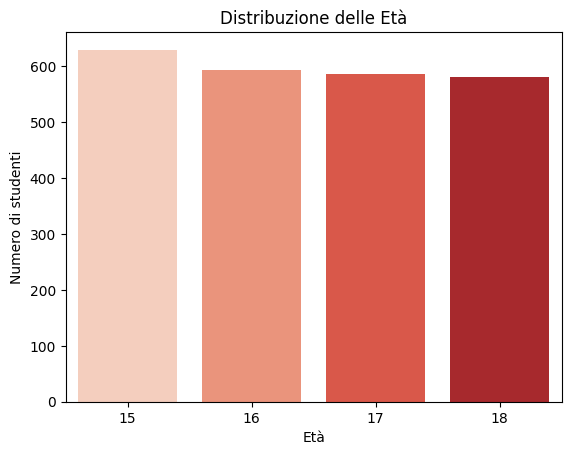

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico a barre con Seaborn
sns.countplot(x='Age', data=df, palette='Reds')

# Aggiungi etichette e titolo
plt.xlabel('Età')
plt.ylabel('Numero di studenti')
plt.title('Distribuzione delle Età')

# Mostra il grafico
plt.show()

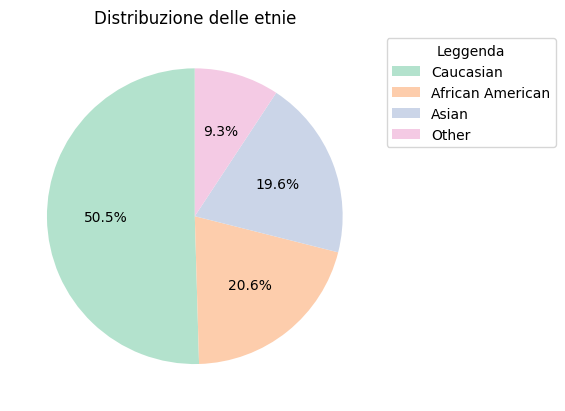

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conta la frequenza di ciascun valore di età
age_counts = df['Ethnicity'].value_counts()

custom_labels = ['Caucasian', 'African American', 'Asian', 'Other']

colors = sns.color_palette('Pastel2', len(age_counts))

fig, ax = plt.subplots()
ax.pie(age_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Aggiungi la leggenda separata
ax.legend(custom_labels, title="Leggenda", loc="upper left", bbox_to_anchor=(1, 1))

# Aggiungi il titolo
plt.title('Distribuzione delle etnie')

# Mostra il grafico
plt.show()


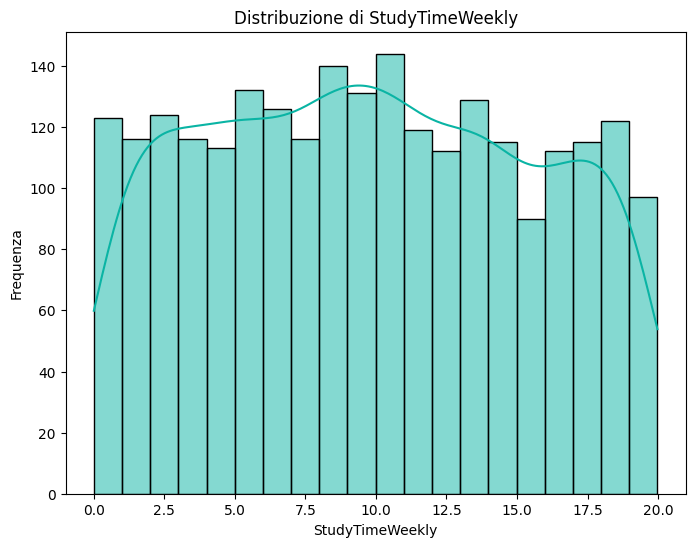

In [140]:

variabile = 'StudyTimeWeekly'

plt.figure(figsize=(8, 6))
sns.histplot(df[variabile], kde=True, bins=20, color='#0ab4a4')
plt.title(f'Distribuzione di {variabile}')
plt.xlabel(variabile)
plt.ylabel('Frequenza')
plt.show()



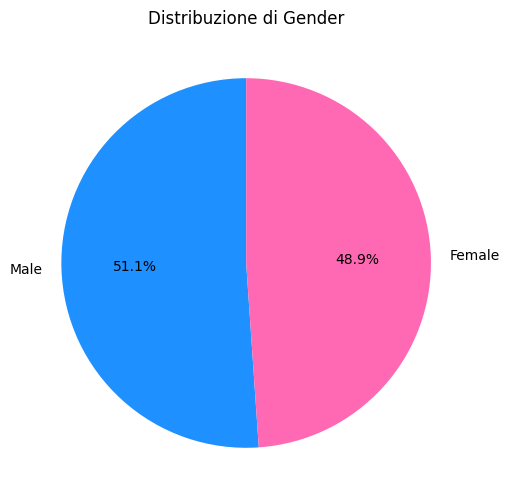

In [141]:
# Calcola la distribuzione di Gender
gender_counts = df['Gender'].value_counts()

# Colori rosa e blu
colors = ['#1E90FF', '#FF69B4']  # Rosa e Blu
labels=['Male', 'Female']

# Crea il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribuzione di Gender')
plt.show()

/var/folders/wz/z6163tcs0v11556rglm8m09h0000gn/T/ipykernel_4759/1584180027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GradeClass', palette="Oranges")


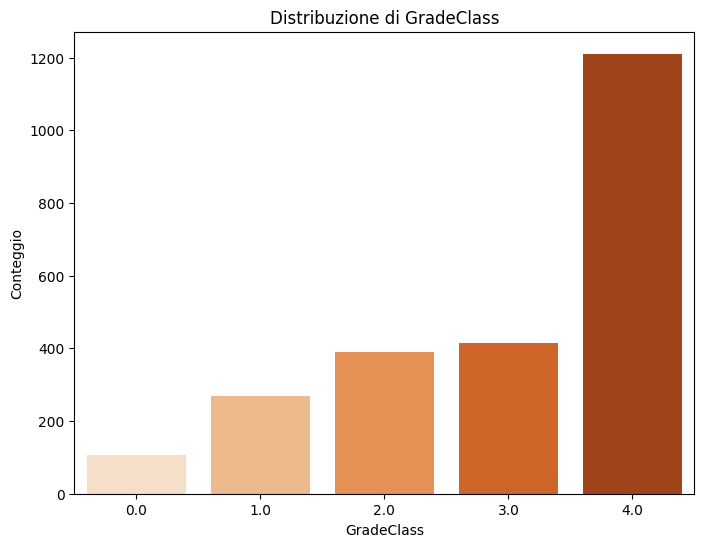

In [142]:
# Distribuzione di GradeClass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GradeClass', palette="Oranges")
plt.title('Distribuzione di GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Conteggio')
plt.show()




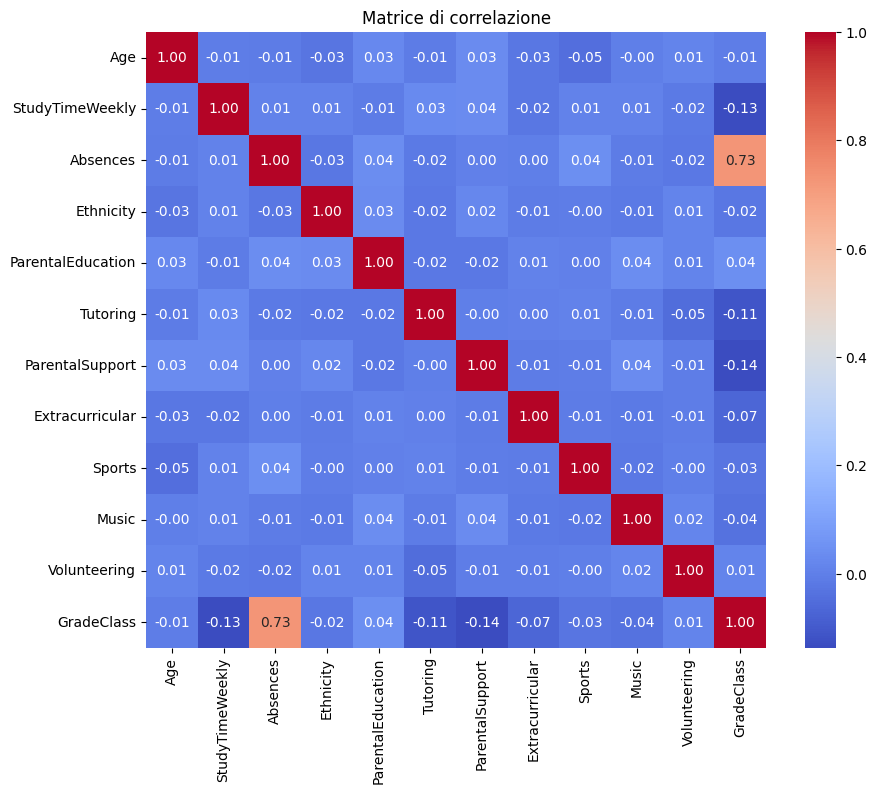

In [150]:
#numerical_cols = [ 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport','GradeClass']
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'Ethnicity','ParentalEducation', 'Tutoring', 'ParentalSupport',	'Extracurricular',	'Sports','Music','Volunteering','GradeClass']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()


/var/folders/wz/z6163tcs0v11556rglm8m09h0000gn/T/ipykernel_4759/572282510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Participates_in_any', y='GradeClass', data=df, palette='Set2')


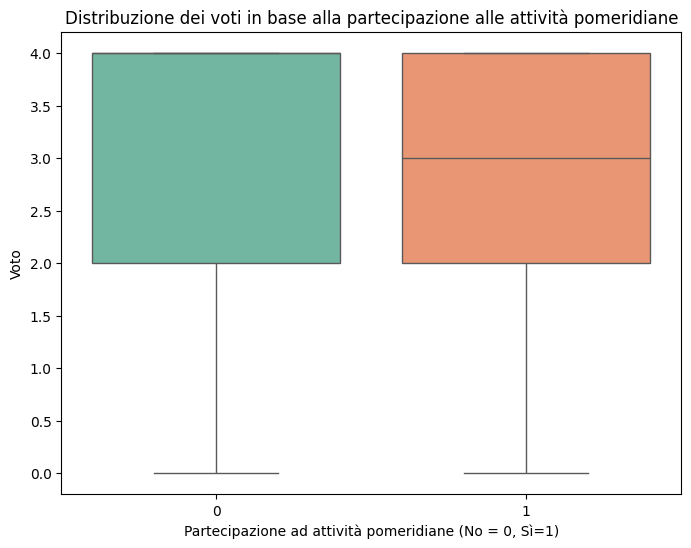

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo una nuova colonna che indica se la persona partecipa ad almeno una delle attività
df['Participates_in_any'] = (df['Extracurricular'] | df['Sports'] | df['Music'] | df['Volunteering']).astype(int)

# Creiamo un boxplot per visualizzare il voto in base alla partecipazione alle attività
plt.figure(figsize=(8, 6))
sns.boxplot(x='Participates_in_any', y='GradeClass', data=df, palette='Set2')

# Aggiungiamo il titolo e le etichette
plt.title('Distribuzione dei voti in base alla partecipazione alle attività pomeridiane')
plt.xlabel('Partecipazione ad attività pomeridiane (No = 0, Sì=1)')
plt.ylabel('Voto')

# Mostriamo il grafico
plt.show()


## PCA


In [145]:
from sklearn.preprocessing import StandardScaler


# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass', 'Participates_in_any'],
      dtype='object')


In [146]:
# Normalizza i dati
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

In [147]:
from sklearn.decomposition import PCA

# Applica PCA
pca = PCA(n_components=5)  # Puoi scegliere un numero di componenti minori per ridurre la dimensionalità
principal_components = pca.fit_transform(df_scaled)

# Aggiungi le componenti principali al dataset originale
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])


In [148]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.290723,0.845781,0.609389,2.106309,-0.939282
1,0.304457,3.045288,-0.009986,-0.530941,-0.957443
2,-2.541561,0.223354,-0.199692,-0.930726,1.606978
3,0.369841,-0.469429,0.958073,0.122299,-1.057242
4,-1.844212,1.019560,0.079496,0.585599,-1.223931


In [149]:
import pandas as pd

# Matrice dei carichi: mostra come le variabili originali contribuiscono alle componenti principali
loadings = pd.DataFrame(pca.components_, columns=numeric_cols, index=["PC1", "PC2", "PC3", "PC4", "PC5"])  # Puoi adattare a più componenti

print("Carichi delle componenti principali:")
print(loadings)

# Proporzione di varianza spiegata: mostra quanta varianza viene catturata da ogni componente
explained_variance_ratio = pca.explained_variance_ratio_

print("\nProporzione di varianza spiegata:")
for i, variance in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {variance * 100:.2f}%")


Carichi delle componenti principali:
          Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly   
PC1 -0.023414 -0.026742   0.007420          -0.033836         0.078440  \
PC2  0.049439 -0.030005   0.054048          -0.074818         0.100616   
PC3  0.446945  0.359066   0.156267           0.296666        -0.062569   
PC4  0.098998  0.180768  -0.066549          -0.041256         0.583485   
PC5 -0.451742 -0.049196   0.688423           0.213811         0.176519   

     Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music   
PC1 -0.480628  0.073955         0.106181         0.324783  0.227087  0.205002  \
PC2 -0.466711  0.103019         0.078188        -0.314344 -0.304002 -0.191761   
PC3 -0.067496 -0.411851         0.220848        -0.140721 -0.298533  0.319398   
PC4  0.249139  0.258408         0.518445        -0.180301  0.188906  0.264931   
PC5 -0.011194 -0.188586         0.010161        -0.286633  0.311467 -0.065355   

     Volunteering  GradeClass  